In [15]:
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

In [17]:
microsoft = pd.read_csv('MicrosoftStock.csv')
print(microsoft.head())

    index        date   open   high    low  close    volume  Name
0  390198  2013-02-08  27.35  27.71  27.31  27.55  33318306  MSFT
1  390199  2013-02-11  27.65  27.92  27.50  27.86  32247549  MSFT
2  390200  2013-02-12  27.88  28.00  27.75  27.88  35990829  MSFT
3  390201  2013-02-13  27.93  28.11  27.88  28.03  41715530  MSFT
4  390202  2013-02-14  27.92  28.06  27.87  28.04  32663174  MSFT


In [18]:
microsoft.shape

(1259, 8)

In [19]:
microsoft.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1259 non-null   int64  
 1   date    1259 non-null   object 
 2   open    1259 non-null   float64
 3   high    1259 non-null   float64
 4   low     1259 non-null   float64
 5   close   1259 non-null   float64
 6   volume  1259 non-null   int64  
 7   Name    1259 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 78.8+ KB


In [20]:
microsoft.describe()

,index,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,390827.000000,51.026394,51.436007,50.630397,51.063081,3.386946e+07
std,363.586303,14.859387,14.930144,14.774630,14.852117,1.958979e+07
min,390198.000000,27.350000,27.600000,27.230000,27.370000,7.425603e+06
25%,390512.500000,40.305000,40.637500,39.870000,40.310000,2.254879e+07
50%,390827.000000,47.440000,47.810000,47.005000,47.520000,2.938758e+07
75%,391141.500000,59.955000,60.435000,59.275000,59.730000,3.842024e+07
max,391456.000000,95.140000,96.070000,93.720000,95.010000,2.483542e+08


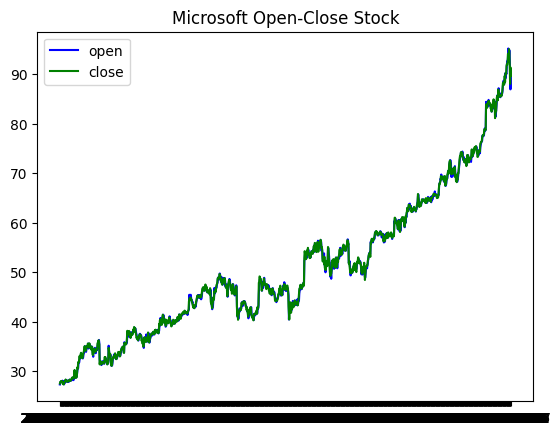

In [21]:
plt.plot(microsoft['date'],
		microsoft['open'],
		color="blue",
		label="open")
plt.plot(microsoft['date'],
		microsoft['close'],
		color="green",
		label="close")
plt.title("Microsoft Open-Close Stock")
plt.legend()

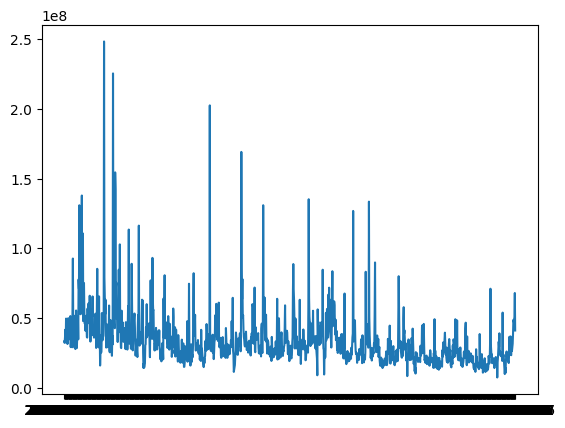

In [22]:
plt.plot(microsoft['date'],
		microsoft['volume'])
plt.show()

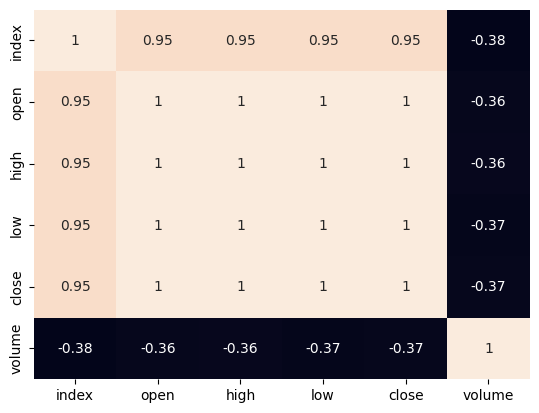

In [23]:
numeric_data = microsoft.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), annot=True, cbar=False)
plt.show()

Text(0.5, 1.0, 'Microsoft Stock Prices')

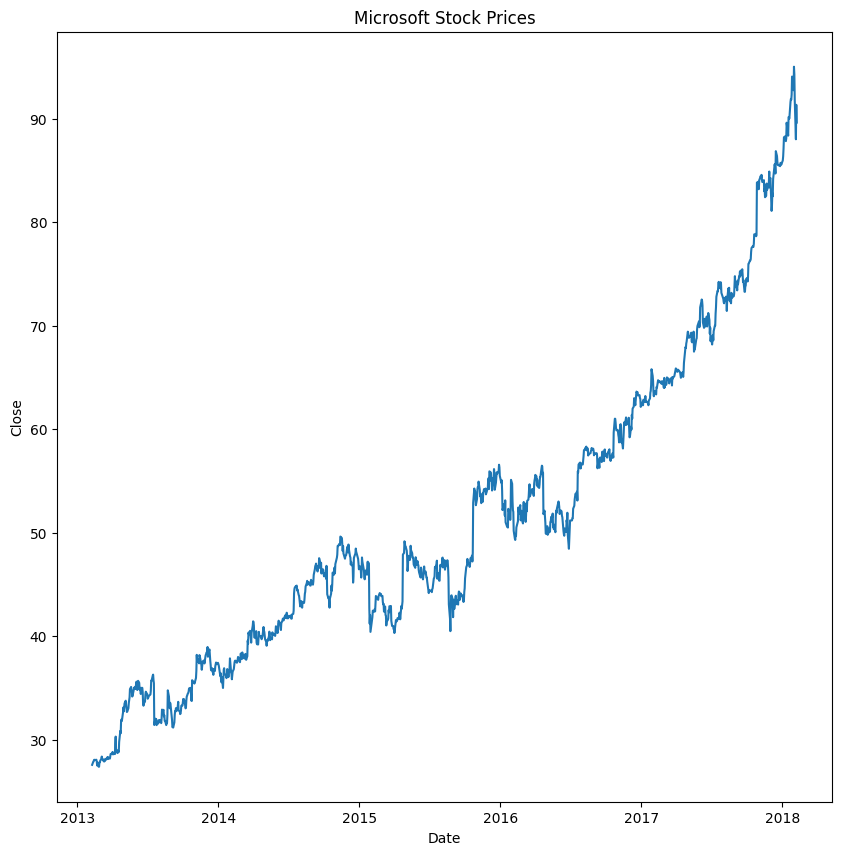

In [24]:
microsoft['date'] = pd.to_datetime(microsoft['date'])
prediction = microsoft.loc[(microsoft['date']
							> datetime(2013, 1, 1))
							& (microsoft['date']
							< datetime(2018, 1, 1))]

plt.figure(figsize=(10, 10))
plt.plot(microsoft['date'], microsoft['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Microsoft Stock Prices")


In [30]:
# prepare the training set samples
msft_close = microsoft.filter(['close'])
dataset = msft_close.values
training = int(np.ceil(len(dataset) *0.95))

# scale the data
ss = StandardScaler()
ss = ss.fit_transform(dataset)

train_data = ss[0:int(training), :]

x_train = []
y_train = []

# considering 60 as the batch size,
# create the X_train and y_train
for i in range(60, len(train_data)):
	x_train.append(train_data[i-60:i, 0])
	y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train),\
				np.array(y_train)
X_train = np.reshape(x_train,
					(x_train.shape[0],
					x_train.shape[1], 1))




In [26]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
							return_sequences=True,
							input_shape
							=(X_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(128))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))

print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 64)            16896     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 58,369
Trainable params: 58,369
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
from keras.metrics import RootMeanSquaredError
model.compile(optimizer='adam',
			loss='mae',
			metrics=RootMeanSquaredError())

history = model.fit(X_train, y_train,
					epochs=20)


Epoch 1/20
36/36 [==============================] - 5s 42ms/step - loss: 0.2077 - root_mean_squared_error: 0.3095
Epoch 2/20
36/36 [==============================] - 1s 36ms/step - loss: 0.1035 - root_mean_squared_error: 0.1403
Epoch 3/20
36/36 [==============================] - 1s 32ms/step - loss: 0.0947 - root_mean_squared_error: 0.1261
Epoch 4/20
36/36 [==============================] - 1s 32ms/step - loss: 0.0963 - root_mean_squared_error: 0.1311
Epoch 5/20
36/36 [==============================] - 1s 32ms/step - loss: 0.0952 - root_mean_squared_error: 0.1309
Epoch 6/20
36/36 [==============================] - 1s 32ms/step - loss: 0.0922 - root_mean_squared_error: 0.1212
Epoch 7/20
36/36 [==============================] - 1s 37ms/step - loss: 0.0859 - root_mean_squared_error: 0.1147
Epoch 8/20
36/36 [==============================] - 1s 35ms/step - loss: 0.0828 - root_mean_squared_error: 0.1124
Epoch 9/20
36/36 [==============================] - 1s 32ms/step - loss: 0.0805 - root_m

In [28]:
testing = ss[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(testing)):
	x_test.append(testing[i-60:i, 0])

x_test = np.array(x_test)
X_test = np.reshape(x_test,
					(x_test.shape[0],
					x_test.shape[1], 1))

pred = model.predict(X_test)


2/2 [==============================] - 1s 15ms/step


C:\Users\STOYL\AppData\Local\Temp\ipykernel_21836\1781517309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'Predictions'] = pred


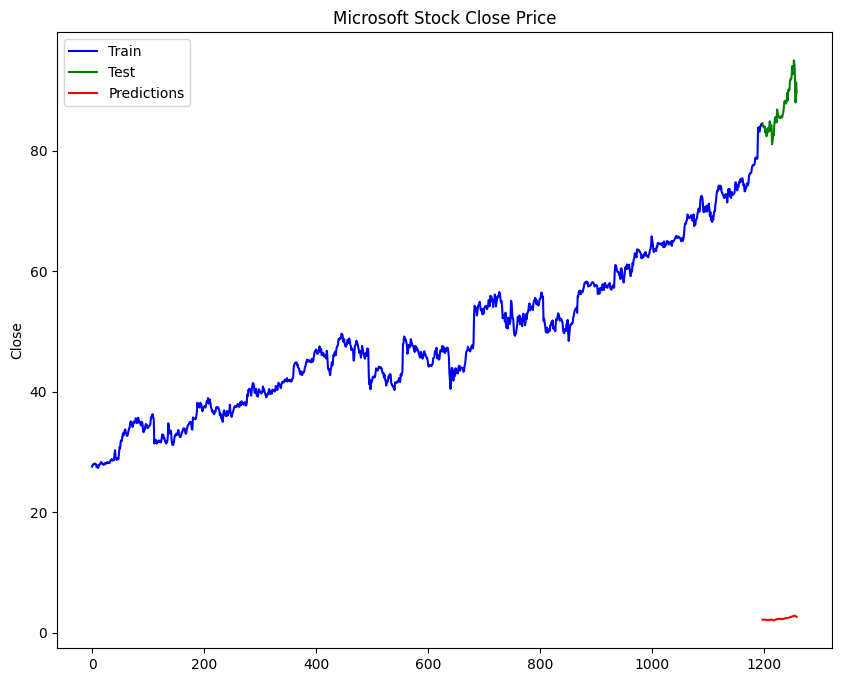

In [29]:
train = microsoft[:training]
test = microsoft[training:]
test.loc[:, 'Predictions'] = pred
  
plt.figure(figsize=(10, 8))
plt.plot(train['close'], c="b")
plt.plot(test['close'], c="g")
plt.plot(test['Predictions'], c="r")
plt.title('Microsoft Stock Close Price')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])
plt.show()
